## <center> Advertising Media Campaigns Using Regression Analysis</center>



## Introduction
#### A regression with 2 or more predictor variables is called Multiple Regression.  Linear models are often useful but the world is usually not so simple.  For a more realistic understanding we need models with several variables.

#### Marketing in business can promote a product knowing which combination of advertising media channels (TV, Radio, Newspaper) are beneficial for the company and can be crucial in getting ahead of competitors.  

#### The responsibility of media planners is to know the merits of each type of advertising media that engages in which audiences in distinct ways.  They evaluate the greatest amount of benefits for the least relative cost.

#### Multiple Regression is a method for predicting a quantitative response using several features. The mathematical equation is:


#### <center> $ Y = \beta_0  + \beta_1x  + ... +  \beta_2x_k + E $ </center>

####  Y is the dependent variable, $ \beta_1, \beta_2 $ are the coefficients each multiplied by X, the variable predictors, and E is the error. 
 
 


# The Problem Statement
#### This data is about the cost in thousands of dollars among TV, Radio, and Newspaper channels. The goal is to improve revenue growth by predicting which media combination maximizes a ROI.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Lines below are just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv')


#### This Advertising Dataset contains statistics about the sales of product x in 200 different markets. The media channels are TV, Radio, and Newspaper with their own advertising budget.


In [3]:
data.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## Using Pearson Method of Correlation 

In [4]:
data = data.drop(['Unnamed: 0'], axis=1)

#### data.info()

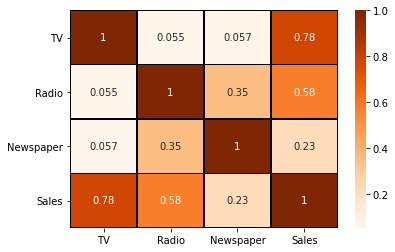

In [5]:
sns.heatmap(data.corr(),annot=True, cmap='Oranges', linewidth=.3, linecolor='black')
plt.show()



#### This Pearson correlation measures the strength of a linear relationship between sales and each predictor variable. All media channels are positively correlated with sales.  So more of product x will push sales higher. This heat map concisely shows TV media is highly correlated with sales (78%), followed by radio media(58%), while newspaper media is correlated with lower sales(23%). 

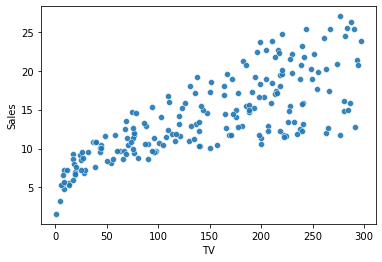

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.scatterplot(x="TV", y="Sales", data=data, alpha=0.90);

####  Fig 1. Sales per TV Budget. TV media and Sales have a strong positive linear relationship.

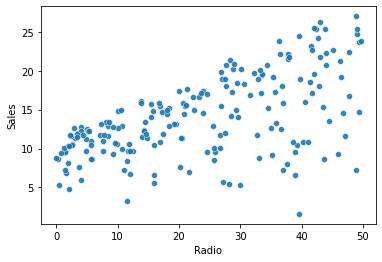

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Radio", y="Sales", data=data, alpha=0.90);

#### Fig 2: Sales per Radio Budget. Radio media and sales have a greater than 50% positive linear relationship.

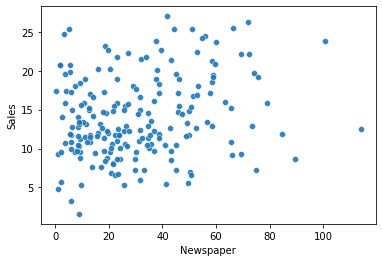

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Newspaper", y="Sales", data=data, alpha=0.90);

#### Fig 3: Sales per Newspaper Budget. Sales and Newspaper appear to have no relationship at all.  However there is no bend or non-linearity so it satisfies the Straight Enough Condition.

In [9]:
round(data.describe(),2)

,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00
mean,147.04,23.26,30.55,14.02
std,85.85,14.85,21.78,5.22
min,0.70,0.00,0.30,1.60
25%,74.38,9.98,12.75,10.38
50%,149.75,22.90,25.75,12.90
75%,218.82,36.52,45.10,17.40
max,296.40,49.60,114.00,27.00


#### Table 1: Descriptive Statistics of Product x in 200 Markets.

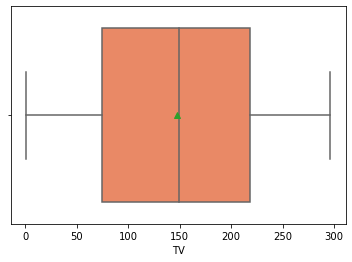

In [10]:
sns.boxplot(data['TV'], showmeans=True, color='coral');

####  Fig 4: TV media has a mean of approximately 150 and is evenly distributed among the markets.sales are approximately 150 markets.  

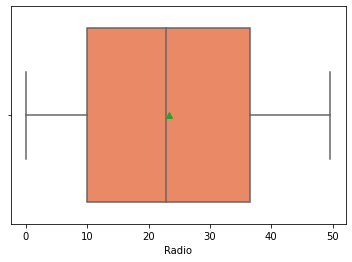

In [11]:
sns.boxplot(data['Radio'], showmeans=True, color='coral');


#### Fig 5: Radio media has a mean of approximately 25 and is evenly distributed among the markets.

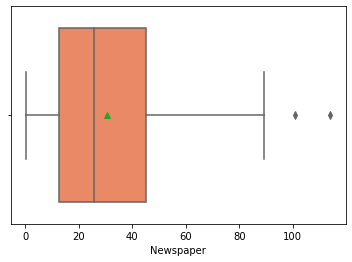

In [12]:
sns.boxplot(data['Newspaper'], showmeans=True, color='coral');


#### Fig 6: Newspaper media has outliers pulling the mean of newpaper media higher.  Outliers need to be looked at for specific markets which may change financial allocation.

In [13]:
round(data['Newspaper'].describe(),3)

count    200.000
mean      30.554
std       21.779
min        0.300
25%       12.750
50%       25.750
75%       45.100
max      114.000
Name: Newspaper, dtype: float64

Text(0, 0.5, 'Sales [Thousands of Dollars]')

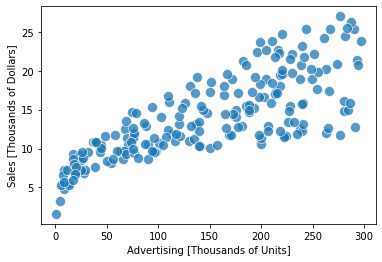

In [14]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x="TV", y="Sales", data=data, s = 100, alpha=0.75)
plt.xlabel('Advertising [Thousands of Units]')
plt.ylabel('Sales [Thousands of Dollars]')


#### Table 2: The mean of 30 is higher than the descriptive statistics.

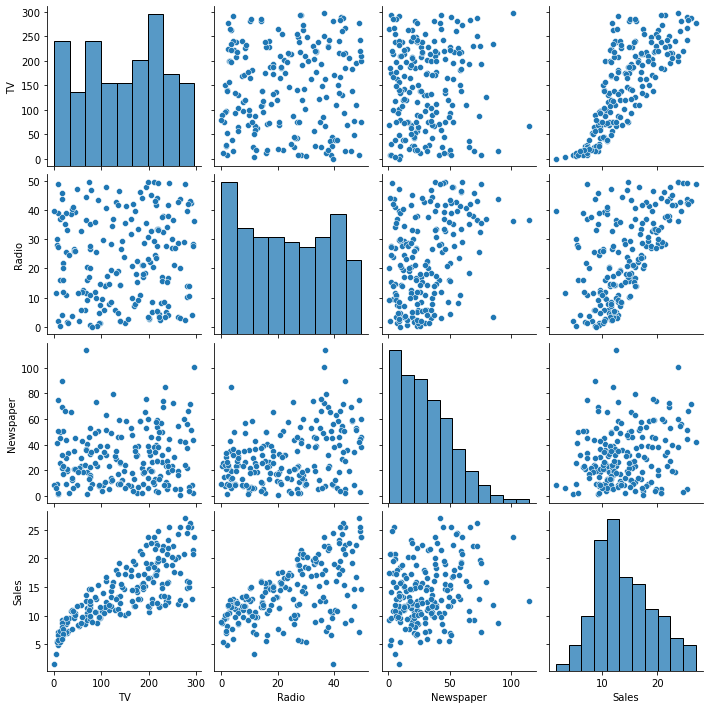

In [15]:
sns.pairplot(data);

#### Table 3: The pairplot shows multiple pairwise bivariate combinations as a matrix of plots.  The diagonal plots are the univariate plots.

## Using the Train_Test_Split Function
#### The training data trains the model. Once it has learned from the training data, the model will be evaluated based on the test data.  The evaluation is discovering how the model performs and what the accuracy score of the model is.






In [16]:
X = data[['TV', 'Radio', 'Newspaper']]  # Input features
y = data['Sales']    # Target variable

# Paritioned data 80%, 20% training, testing
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2)


## Regression Modeling

In [17]:
# Training model1(TV,Radio,Newspaper)
model = LinearRegression()
model.fit(X_train, y_train);


#### Building 2nd model comparing subset of features to the whole 

In [18]:
# Multiple regression models

X2 = data[['TV', 'Radio']]
y2 = data['Sales']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=2, test_size=0.2)

In [19]:
# Training model2(TV,Radio)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)


LinearRegression()

In [20]:
import numpy as np
print(np.round(model.intercept_, 4))

 # print([np.round(val, 4) for val in model.coef_])


3.0545


In [21]:
coefficient = list(zip(data.columns.tolist(), model.coef_))
coefficient

[('TV', 0.04735257168501801),
 ('Radio', 0.17323832458475988),
 ('Newspaper', 0.00466518720051937)]

#### Predictive Regression Model is the following. Sales = 0.0474 * TV + 0.1732 * Radio + 0.0047 * Newspaper + 3.0545 

In [22]:
weights = [np.round(val, 4) for val in model.coef_]
weights = np.array(weights)
weights = np.reshape(weights,[3, 1])
weights

array([[0.0474],
       [0.1732],
       [0.0047]])

In [23]:
input_features = X_test.to_numpy()
input_features = input_features[0:10] 

In [24]:
input_features @ weights + np.round(model.intercept_, 4)

array([[14.06124],
       [ 9.3639 ],
       [ 6.84521],
       [15.58645],
       [18.25214],
       [15.70785],
       [ 7.30594],
       [20.56937],
       [12.92393],
       [17.58375]])

In [25]:
# Using SKlearn Making predictions using the coefficients that were obtained during training Model(TV,Radio,News)
y_pred = model.predict(X_test)


# Predicted sales of the first 10 rows of the testing set
y_pred[0:10]

array([14.0533655 ,  9.3596964 ,  6.84168105, 15.57542062, 18.24566528,
       15.69705683,  7.30213681, 20.55741282, 12.91982687, 17.56977582])

In [26]:
#  R^2 for testing between 0-1

model.score(X_test,y_test)


0.7575894500772719

In [27]:
model2.score(X_test2,y_test2)

0.7629335290913721